In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import collections
from operator import itemgetter
from collections import OrderedDict
from operator import itemgetter
from matplotlib.pyplot import show
from pandas import DataFrame
import seaborn as sns
from seaborn import FacetGrid
%matplotlib inline
from numpy import median

In [2]:
os.chdir("/Users/chanduboss/Desktop/SUITEAMERICA")
os.getcwd()

'/Users/chanduboss/Desktop/SUITEAMERICA'

In [3]:
suite = pd.read_csv("Final_data.csv")
suite.head()
suite.tail()

,DailyRent,SuiteSizeCode,Status,ZoneCode,City,State,Stay,Movein_Day,Moveout_Day,MoveIn_Week,MoveOut_Week,Movein_Month,Moveout_Month,MoveinYear,MoveOutYear
25704,273.0,2X2,TERMED,5,CUPERTINO,US-CA,44.0,Wednesday,Friday,6,13.0,February,March,2016,2016
25705,295.0,2X2,TERMED,8,SAN FRANCISCO,US-CA,29.0,Sunday,Monday,32,36.0,August,September,2015,2015
25706,112.0,1X1,TERMED,27,SAN RAFAEL,US-CA,1.0,Saturday,Sunday,10,10.0,March,March,2018,2018
25707,169.0,1X1,TERMED,1,DUBLIN,US-CA,29.0,Tuesday,Wednesday,10,14.0,March,April,2018,2018
25708,121.0,1X1,TERMED,46,PORTLAND,US-OR,30.0,Monday,Wednesday,13,17.0,March,April,2016,2016


In [47]:
suite.dtypes

DailyRent          int64
SuiteSizeCode      int64
Status            object
ZoneCode           int64
City              object
State             object
Stay               int64
Movein_Day        object
Moveout_Day       object
MoveIn_Week        int64
MoveOut_Week     float64
Movein_Month      object
Moveout_Month     object
MoveinYear         int64
MoveOutYear        int64
dtype: object

In [5]:
suite.DailyRent = suite.DailyRent.astype(int)
suite.Stay = suite.Stay.astype(int)
suite.MoveIn_Week = suite.MoveIn_Week.astype(int)

In [6]:
suite.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25709 entries, 0 to 25708
Data columns (total 15 columns):
DailyRent        25709 non-null int64
SuiteSizeCode    25709 non-null object
Status           25709 non-null object
ZoneCode         25709 non-null int64
City             25709 non-null object
State            25709 non-null object
Stay             25709 non-null int64
Movein_Day       25709 non-null object
Moveout_Day      25709 non-null object
MoveIn_Week      25709 non-null int64
MoveOut_Week     25709 non-null float64
Movein_Month     25709 non-null object
Moveout_Month    25709 non-null object
MoveinYear       25709 non-null int64
MoveOutYear      25709 non-null int64
dtypes: float64(1), int64(6), object(8)
memory usage: 2.9+ MB


Text(0.5,1,'Average prices of the Suites')

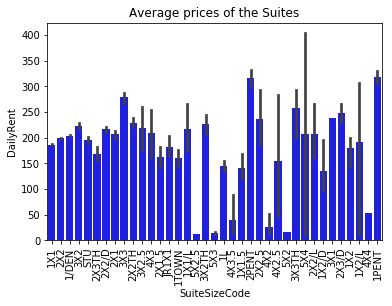

In [7]:
bar = sns.barplot(x="SuiteSizeCode",y="DailyRent",data= suite,color="b")
bar.set_xticklabels(bar.get_xticklabels(),rotation=90)
bar.set_title("Average prices of the Suites")



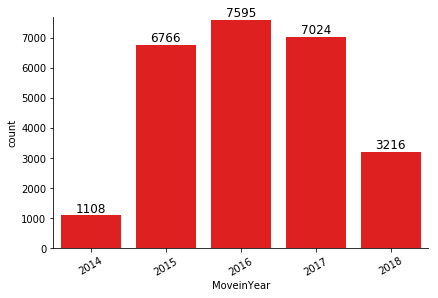

In [8]:
miy = sns.factorplot("MoveinYear", data=suite, aspect=1.5, kind="count", color="red")
miy.set_xticklabels(rotation=30)
    
def roundup(x):
    return 100 + int(math.ceil(x / 100.0)) * 100

ax = plt.gca()
y_max = suite['MoveinYear'].value_counts().max()
ax.set_ylim([0, roundup(y_max)])

for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()),fontsize=12, color='black', ha='center', va='bottom')


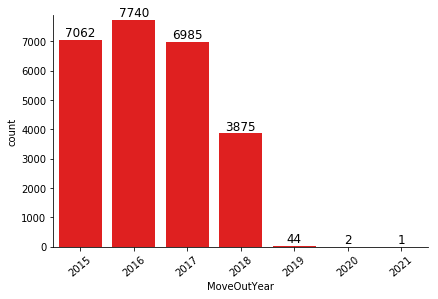

In [9]:
moy = sns.factorplot("MoveOutYear", data=suite, aspect=1.5, kind="count", color="red")
moy.set_xticklabels(rotation=40)

def roundup(x):
    return 100 + int(math.ceil(x / 100.0)) * 100

ax = plt.gca()
y_max = suite['MoveOutYear'].value_counts().max()
ax.set_ylim([0, roundup(y_max)])

for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()),fontsize=12, color='black', ha='center', va='bottom')


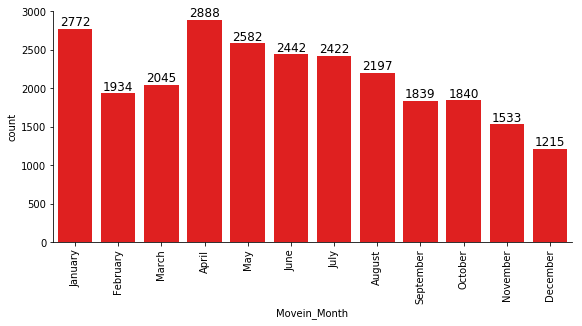

In [10]:
mim = sns.factorplot("Movein_Month", data=suite, aspect=2, kind="count", color="red",
                     order=["January","February","March","April","May","June","July","August",
                           "September","October","November","December"])
mim.set_xticklabels(rotation=90)

def roundup(x):
    return 100 + int(math.ceil(x / 100.0)) * 100

ax = plt.gca()
y_max = suite['Movein_Month'].value_counts().max()
ax.set_ylim([0, roundup(y_max)])

for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()),fontsize=12, color='black', ha='center', va='bottom')


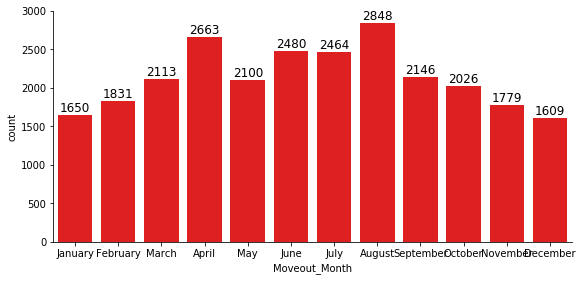

In [11]:


def roundup(x):
    return 100 + int(math.ceil(x / 100.0)) * 100

mom = sns.factorplot("Moveout_Month", data=suite, aspect=2, kind="count", color="red",
                    order=["January","February","March","April","May","June","July","August",
                           "September","October","November","December"])
# mom.set_xticklabels(rotation=90)

ax = plt.gca()
y_max = suite['Moveout_Month'].value_counts().max()
ax.set_ylim([0, roundup(y_max)])

for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()),fontsize=12, color='black', ha='center', va='bottom')


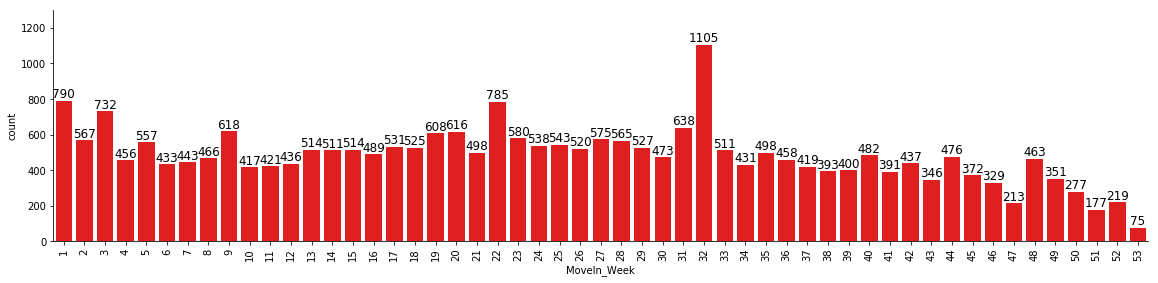

In [12]:
miw = sns.factorplot("MoveIn_Week", data=suite, aspect=4, kind="count", color="red")
miw.set_xticklabels(rotation=90)

def roundup(x):
    return 100 + int(math.ceil(x / 100.0)) * 100

ax = plt.gca()
y_max = suite['MoveIn_Week'].value_counts().max()
ax.set_ylim([0, roundup(y_max)])

for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()),fontsize=12, color='black', ha='center', va='bottom')


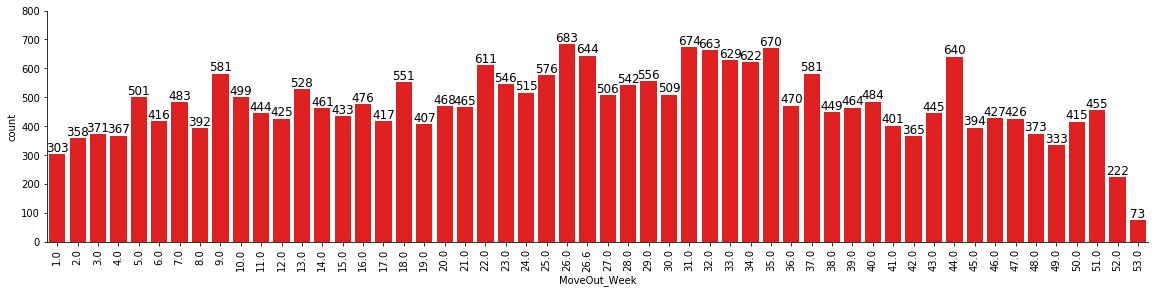

In [13]:
mow = sns.factorplot("MoveOut_Week", data=suite, aspect=4, kind="count", color="red")
mow.set_xticklabels(rotation=90)


def roundup(x):
    return 100 + int(math.ceil(x / 100.0)) * 100

ax = plt.gca()
y_max = suite['MoveOut_Week'].value_counts().max()
ax.set_ylim([0, roundup(y_max)])

for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()),fontsize=12, color='black', ha='center', va='bottom')


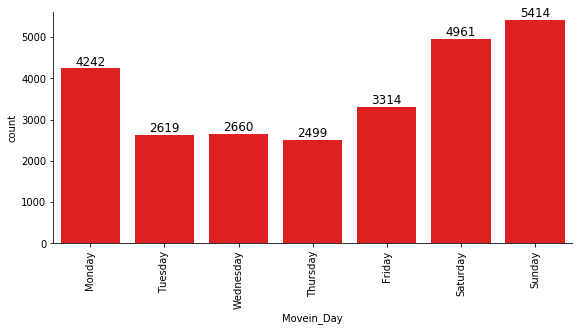

In [14]:
mid = sns.factorplot("Movein_Day", data=suite, aspect=2, kind="count", color="red",
                     order=["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"])
mid.set_xticklabels(rotation=90)

def roundup(x):
    return 100 + int(math.ceil(x / 100.0)) * 100

ax = plt.gca()
y_max = suite['Movein_Day'].value_counts().max()
ax.set_ylim([0, roundup(y_max)])

for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()),fontsize=12, color='black', ha='center', va='bottom')


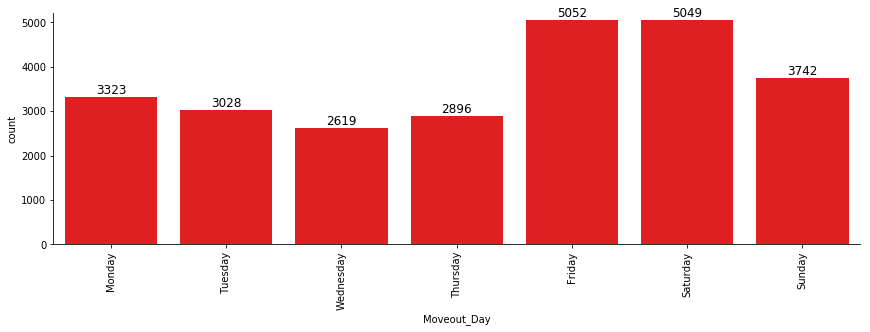

In [15]:
mod = sns.factorplot("Moveout_Day", data=suite, aspect=3, kind="count", color="red",
                     order=["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"])
mod.set_xticklabels(rotation=90)

def roundup(x):
    return 100 + int(math.ceil(x / 100.0)) * 100

ax = plt.gca()
y_max = suite['Moveout_Day'].value_counts().max()
ax.set_ylim([0, roundup(y_max)])

for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()),fontsize=12, color='black', ha='center', va='bottom')


Text(0.5,1,'Daily Rents per zone')

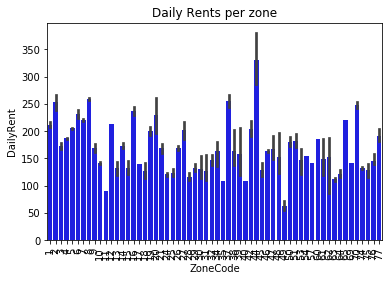

In [16]:
zone = sns.barplot(x="ZoneCode",y="DailyRent",data= suite,color="b")
zone.set_xticklabels(zone.get_xticklabels(),rotation=90)
zone.set_title("Daily Rents per zone")

/Users/chanduboss/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


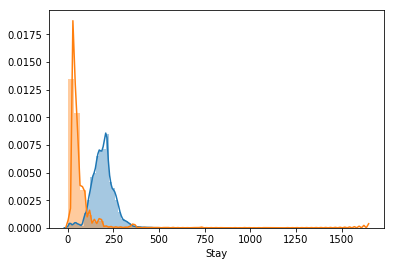

In [17]:
sns.distplot(suite["DailyRent"],hist=True)
sns.distplot(suite['Stay']);

In [18]:
suite.SuiteSizeCode.dtype

dtype('O')

<BarContainer object of 25709 artists>

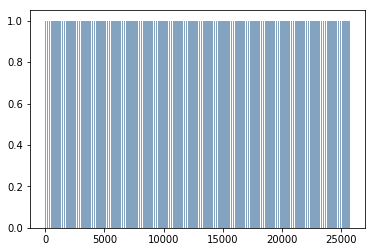

In [19]:
suite.SuiteSizeCode = np.arange(len(suite.SuiteSizeCode))
plt.bar(suite.SuiteSizeCode, height=1, color=(0.2, 0.4, 0.6, 0.6))
